In [10]:
import gym
import gym_sokoban
import torch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils.convert import to_networkx

from data.constants import TinyWorldElements as elem
from data.embedding import MinimalEmbedding, NoWallsEmbedding

## Interacting with gym sokoban

In [11]:
env = gym.make("Sokoban-small-v1")
env.seed(0)
env.reset(render_mode="tiny_rgb_array")

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [160, 212,  56],
        [243, 248, 238],
        [243, 248, 238],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [142, 121,  56],
        [142, 121,  56],
        [243, 248, 238],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [243, 248, 238],
        [254, 126, 125],
        [243, 248, 238],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [243, 248, 238],
        [  0,   0,   0],
        [254, 126, 125],
        [142, 121,  56],
        [243, 248, 238],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [243, 248, 238],
        [243, 248, 238],
        [243, 248, 238],
        [243, 2

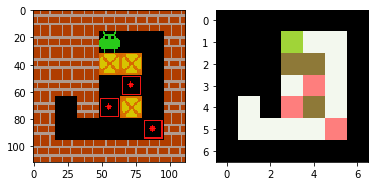

In [12]:
# 2 different displays
def show_grids():
    fix, axes = plt.subplots(1, 2)
    axes[0].imshow(env.render("rgb_array"))
    axes[1].imshow(env.render("tiny_rgb_array"))
    
show_grids()

In [13]:
# Available actions 
env.get_action_lookup()

{0: 'no operation',
 1: 'push up',
 2: 'push down',
 3: 'push left',
 4: 'push right',
 5: 'move up',
 6: 'move down',
 7: 'move left',
 8: 'move right'}

Reward:  -0.1


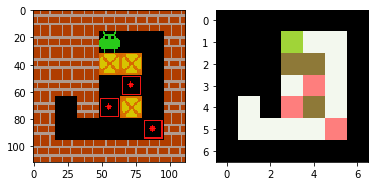

In [14]:
# Do nothing
observation, reward, done, info = env.step(0)
print("Reward: ", reward)
show_grids()

Reward:  -0.1


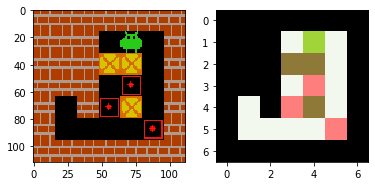

In [15]:
# Push right
observation, reward, done, info = env.step(4)
print("Reward: ", reward)
show_grids()

Reward:  0.9


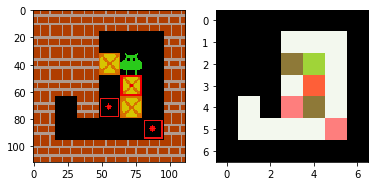

In [16]:
# Push down 
observation, reward, done, info = env.step(2)
print("Reward: ", reward)
show_grids()

## Building a graph from the pixels

In [17]:
# Using the simple representation "tiny_rgb_array"
pixels_state = env.reset(render_mode="tiny_rgb_array")
emb = MinimalEmbedding()
G = emb(pixels_state)

In [18]:
def show_graph_nx(graph_nx, node_color, pos_map, title=""):
    plt.figure(1, figsize=(7,7)) 
    plt.title(title)
    nx.draw(graph_nx, cmap=plt.get_cmap('seismic'), node_color=node_color, node_size=75, linewidths=6, pos=pos_map)
    plt.show()

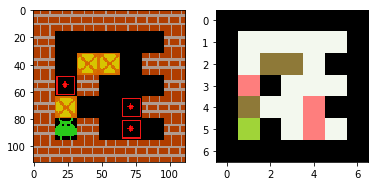

In [19]:
show_grids()

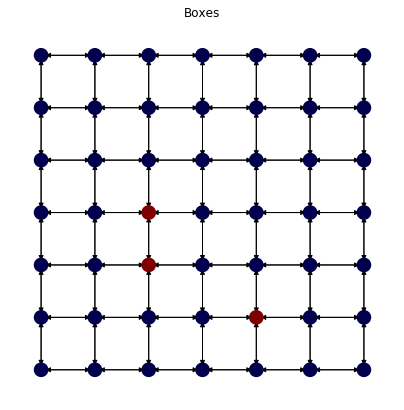

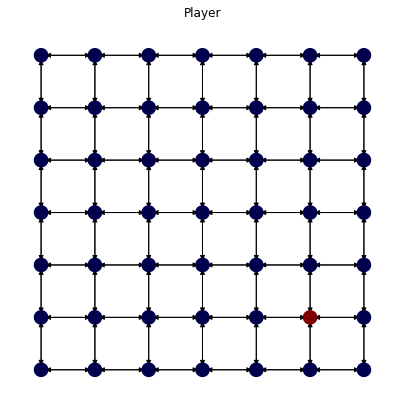

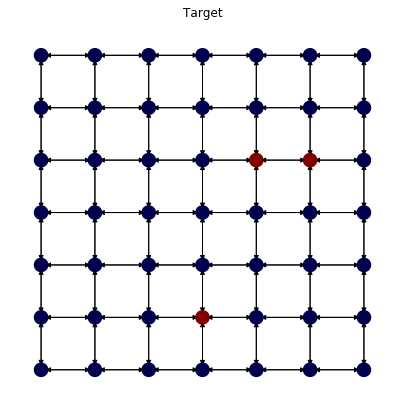

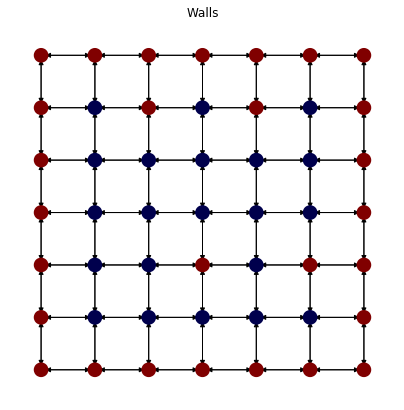

In [20]:
pos_map = {i: pos.numpy() for i, pos in enumerate(G.pos)}
show_graph_nx(to_networkx(G), G.x[:, 0], pos_map, "Boxes")
show_graph_nx(to_networkx(G), G.x[:, 1], pos_map, "Player")
show_graph_nx(to_networkx(G), G.x[:, 2], pos_map, "Target")
show_graph_nx(to_networkx(G), G.x[:, 3], pos_map, "Walls")

## Removing Wall-Wall links

In [21]:
# Using the simple representation "tiny_rgb_array"
pixels_state = env.reset(render_mode="tiny_rgb_array")
emb = NoWallsEmbedding()
G = emb(pixels_state)

In [46]:
G = emb(pixels_state)

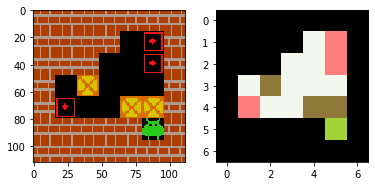

In [47]:
show_grids()

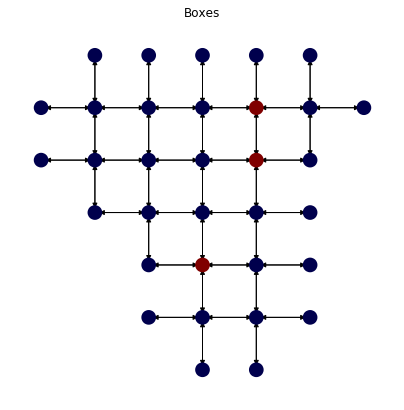

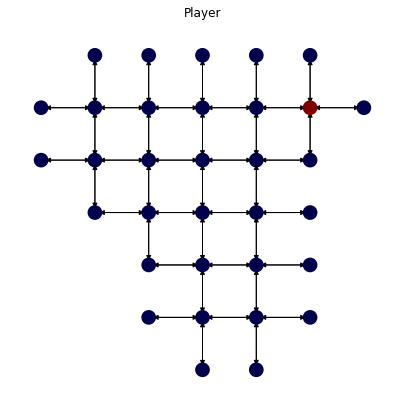

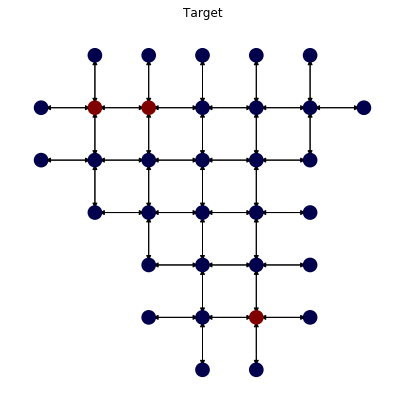

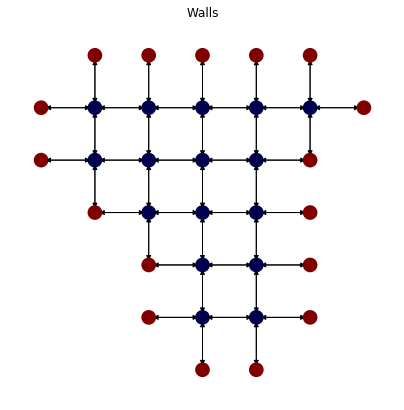

In [48]:
pos_map = {i: pos.numpy() for i, pos in enumerate(G.pos)}
show_graph_nx(to_networkx(G), G.x[:, 0], pos_map, "Boxes")
show_graph_nx(to_networkx(G), G.x[:, 1], pos_map, "Player")
show_graph_nx(to_networkx(G), G.x[:, 2], pos_map, "Target")
show_graph_nx(to_networkx(G), G.x[:, 3], pos_map, "Walls")

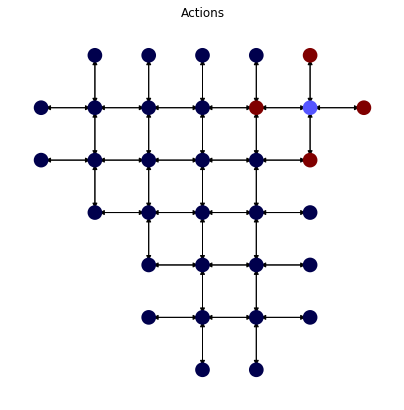

In [49]:
# In blue: the player, in red, the actions 
# the player can also stay where it is
mask = G.mask.flatten()
player = G.x[:, 1]
mask[player != 0] = False
player[mask] = 3.
show_graph_nx(to_networkx(G), player, pos_map, "Actions")